.

File not found.


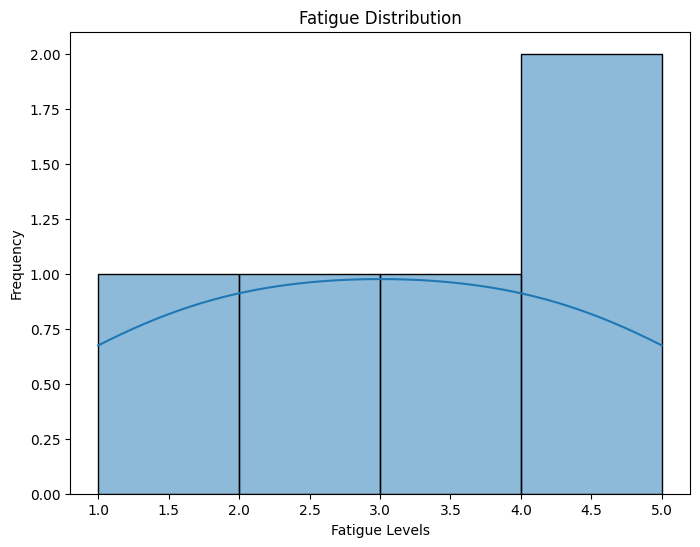

..
----------------------------------------------------------------------
Ran 3 tests in 0.091s

OK


In [9]:
import sys
import os
import unittest
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the project directory is in the Python path
project_path = os.path.abspath(os.getcwd())  # Adjust if code_miniproject.ipynb is in a subfolder
sys.path.append(project_path)

try:
    import code_miniproject  # This will try to import the notebook as a module using import_ipynb
except ModuleNotFoundError:
    raise ModuleNotFoundError("Could not find 'code_miniproject.ipynb'. Make sure it is in the same directory or adjust the path.")

# Function to load data
def load_data(filepath: str) -> pd.DataFrame:
    """Loads data from an Excel file.
    Args:
        filepath (str): Path to the Excel file.
    Returns:
        pd.DataFrame: Loaded data or None if the file does not exist.
    """
    try:
        return pd.read_excel(filepath)
    except FileNotFoundError:
        print("File not found.")
        return None

# Function to run regression
def run_regression(data: pd.DataFrame, dependent_var: str, independent_vars: list):
    """Performs a linear regression.
    Args:
        data (pd.DataFrame): The dataset.
        dependent_var (str): The dependent variable.
        independent_vars (list): List of independent variables.
    Returns:
        sm.OLS: Fitted regression model.
    """
    X = data[independent_vars]
    X = sm.add_constant(X)  # Adds intercept
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

# Function to plot histogram
def plot_histogram(data: pd.DataFrame, column: str, xlabel: str, ylabel: str, title: str):
    """Plots a histogram.
    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column to plot.
        xlabel (str): Label for x-axis.
        ylabel (str): Label for y-axis.
        title (str): Title of the histogram.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

class TestMiniProject(unittest.TestCase):
    def setUp(self):
        # Create sample data for testing
        self.sample_data = pd.DataFrame({
            'fatigue': [1, 2, 3, 4, 5],
            'Volume': [10, 20, 30, 40, 50],
            'hrs_awake': [6, 7, 8, 9, 10],
            'fatigue_levels_driving': [2, 3, 4, 5, 6],
            'Avg_ReactionTime': [200, 210, 220, 230, 240]
        })

    def test_load_data(self):
        # Test that loading a missing file returns None
        self.assertIsNone(load_data("non_existent.xlsx"))
    
    def test_regression_output(self):
        # Test that regression runs without error
        model = run_regression(self.sample_data, 'Avg_ReactionTime', ['fatigue', 'Volume', 'hrs_awake', 'fatigue_levels_driving'])
        self.assertIsNotNone(model)
        self.assertGreater(len(model.params), 0)  # Ensure regression has parameters
    
    def test_plot_histogram(self):
        # Test that histograms generate without errors
        try:
            plot_histogram(self.sample_data, 'fatigue', 'Fatigue Levels', 'Frequency', 'Fatigue Distribution')
            success = True
        except Exception as e:
            success = False
            print(f"Plotting error: {e}")
        self.assertTrue(success)

# In Jupyter notebooks, to avoid the kernel exiting, we pass exit=False
unittest.main(argv=[''], exit=False)
